<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Sajjad Amini</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>

**Student Name**: Mohammad Ali Hashemifar

**Student ID**: 99106758

# Linear Regression

In this exercise, we want to examine **linear regression**. For this purpose, we have prepared a dataset in the `q1.csv` file. This dataset is used to estimate the **heating load** and **cooling load** of a building based on its parameters. The parameters in this dataset are explained below:

- $X_1$: Relative Compactness
- $X_2$: Surface Area
- $X_3$: Wall Area
- $X_4$: Roof Area
- $X_5$: Overall Height
- $X_6$: Orientation
- $X_7$: Glazing Area
- $X_8$: Glazing Area Distribution
- $Y_1$: Heating Load
- $Y_2$: Cooling Load

**Note**: For the sake of simplicity, we will only focus on estimating the **heating load** in this problem. Also, please note that we have some inline questions in this notebook, for which you should write your answers in the **Answer** section below each question.

## Importing Libraries

First we import libraries that we need for this assignment.

**Attention**: You should only use these libraries. Other libraries are not acceptable.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading Data and Preprocessing

In this section, we want to read data from a CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the building (`X1`, `X2`, ..., `X8`) and heating load (`Y1`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [3]:
X, Y = None, None

data = pd.read_csv('q1.csv')

X = data.iloc[:, :8].values
Y = data.iloc[:, 8].values.reshape(-1, 1)

print(X.shape)
print(Y.shape)

(768, 8)
(768, 1)


Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

**Question**: Briefly explain why we need to normalize our data before starting the training.

**Answer**: Normalizing data is a common preprocessing step in machine learning that helps to ensure that all features are treated equally during training. When the features of a dataset are measured on different scales or units, some features can have a larger range of values than others, which can lead to a bias in the training process. This can cause the model to give more weight to features with larger values, even if they are not more important than other features.
Normalizing the data typically involves scaling each feature to have zero mean and unit variance, which brings all the features to a similar scale. This can help to improve the performance and stability of the model during training and make it easier to compare the importance of different features. Additionally, normalization can help to prevent some numerical problems that can arise during training, such as overflow or underflow in the computations.

In [4]:
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

Y_mean = np.mean(Y)
Y_std = np.std(Y)
Y = (Y-Y_mean) / Y_std

Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [5]:
### START CODE HERE ###
X = np.hstack((np.ones((X.shape[0], 1)), X))
### END CODE HERE ###

print(X.shape)

(768, 9)


## Training Model Using Direct Method

We know that the loss function in linear regression is defined as:

$$
\mathcal{L}(\mathbf{w}) = \frac{1}{m}\sum_{i=1}^{m}(\mathbf{w}^\top\mathbf{x}_i-y_i)^2
$$

Here, $w$ is the weight vector and $(x_i, y_i)$ represents the $i$th data point. First, write a function that takes $X$, $Y$, and $w$ as inputs and returns the loss value in the next cell. Note that your implementation should be fully vectorized, meaning that you are not allowed to use any loops in your function and should only use functions prepared in the numpy library.


In [6]:
def loss(X, Y, w):
 m = X.shape[0]
 y_pred = np.dot(X, w)
 loss = (1/m) * np.sum((y_pred - Y) ** 2)
 return loss

Now, we want to calculate the weight matrix, $w$, using the direct method. By direct method, we mean finding the answer to the optimization problem below directly using linear algebra, without using iterative methods:

$$
\min_{w} \mathcal{L}(w)
$$

Question: What is the answer to this problem in terms of $X$ and $Y$?

Answer:
$$
\ w = (X^\top X)^{-1}X^\top Y
$$

Now you should implement a function that receives $X$ and $Y$ as input and returns $w$. Note that your implementation should also be fully vectorized.

In [7]:
def direct_method(X, Y):
 w = np.linalg.inv(X.T @ X) @ X.T @ Y
 return w

Finally, we want to evaluate our loss for this problem. Run the cell below to calculate the loss of your model.

In [8]:
w = direct_method(X, Y) # calculating w using direct method
print(f"loss for this problem using direct method is {loss(X, Y, w)}")

loss for this problem using direct method is 0.08383506710827812


## Training Model Using Gradient Descent

Now, instead of using the direct method to calculate $w$, we want to use the **Gradient Descent** algorithm. We know that in this algorithm, in each iteration, we should update our weight vector with:

$$
\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} - \alpha \nabla \mathcal{L}(\mathbf{w}^{(t)})
$$

Here, $w^{t}$ represents the weight matrix in the $t$th iteration, and $\alpha$ represents the learning rate.

**Question**: Write an expression for $\nabla\mathcal{L}(\mathbf{w})$.

**Answer**:

\begin{equation}
\nabla \mathcal{L}(\mathbf{w}) = \frac{2}{m}X^\top(X\mathbf{w}-Y)
\end{equation}


Now, write a function that computes the gradient of $\mathcal{L}(\mathbf{w})$. This function should receive $X$, $Y$, and $\mathbf{w}$ as inputs and return an $(n+1) \times 1$ vector, which represents $\nabla\mathcal{L}(\mathbf{w})$. Note that your implementation should also be **fully vectorized**.


In [9]:
def gradient(X, Y, w):
    m = X.shape[0]
    grad = (2/m) * X.T @ ((X@w).reshape(-1,1)-Y)
    return grad

Now, we are ready to implement the Gradient Descent algorithm. Complete the function below for this purpose. Note that this function receives $X$, $Y$, the learning rate, and the number of iterations as inputs. This function should return two parameters. The first parameter is $\mathbf{w}$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code. Also note that you should initialize $\mathbf{w}$ with the `randn` function.

In [26]:
def gradient_descent(X, Y, learning_rate, num_iterations):
    m, n = X.shape
    w = np.random.randn(n).reshape(-1,1)
    loss_history = np.zeros(num_iterations)
    
    for i in range(num_iterations):
        grad = gradient(X, Y, w)
        w = w - learning_rate * grad
        loss_history[i] = loss(X, Y, w)
    
    return w, loss_history

Now, run the `gradient_descent` function for 5 different values of the learning rate. Plot the `loss_history` of these 5 different values in the same figure.

**Question**: Discuss the effect of the learning rate and find the best value of this parameter.

**Answer**: The more we increase the learning rate, the faster our hand tends to zero with fewer iterations

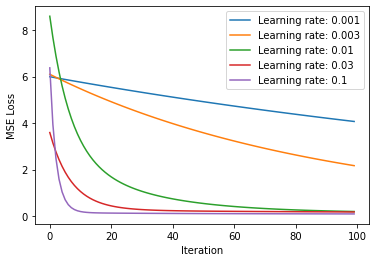

In [38]:
import matplotlib.pyplot as plt

learning_rates = [0.001 , 0.003 , 0.01 , 0.03 , 0.1]
num_iterations = 100

for lr in learning_rates:
    w, loss_history = gradient_descent(X, Y, lr, num_iterations)
    plt.plot(loss_history, label=f'Learning rate: {lr}')

plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

## Conclusion

Compare the answer of two different methods that we used earlier.

**Question**: Discuss these two methods and compare them with each other. When is it better to use the direct method, and when is it better to use Gradient Descent?

**Answer**: The direct method, calculates the optimal weight vector by solving a system of linear equations. It involves inverting a matrix, which can be computationally "expensive" for "large datasets". However, once the optimal weight vector is calculated, it can be used directly to make predictions on new data points.

On the other hand, gradient descent is an iterative optimization algorithm that adjusts the weight vector in the direction of steepest descent of the loss function. It requires "fewer computations" than the direct method and can be used on "large datasets". However, the convergence of gradient descent depends on the learning rate and can be sensitive to the choice of hyperparameters.

In general, it is better to use the direct method when the dataset is small and the computational resources are available. The direct method will provide the optimal weight vector, which can be used to make predictions quickly. However, if the dataset is large and the computational resources are limited, gradient descent can be used to find a good approximation of the optimal weight vector. Gradient descent can also handle non-linear models and non-convex optimization problems, where the direct method may not be applicable.

## (Additional Part) Stochastic Gradient Descent

When the number of data points becomes large, calculating the gradient becomes very complicated. In these circumstances, we use **Stochastic Gradient Descent**. In this algorithm, instead of using all of the data points to calculate the gradient, we use only a small number of them. We choose these small number of points randomly in each iteration. Implement this algorithm, and use it to calculate $w$, and then compare the result with the preceding parts.

In [41]:
def stochastic_gradient_descent(X,Y,k,alpha,num_iter):
    m,n = X.shape
    w = np.zeros((n,1))
    loss_history = []
    
    for i in range(num_iter):
        idx = np.random.choice(m,k)
        X_batch = X[idx]
        Y_batch = Y[idx]
        
        grad = (1/k) * X_batch.T.dot(X_batch.dot(w)-Y_batch)
        w -= alpha * grad
        
        loss = (1/(2*k)) * np.sum((X_batch.dot(w)-Y_batch)**2)
        loss_history.append(loss)
    return w, loss_history